In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# criando o dataset com dados aleatórios
X, _ = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=4
)
X.shape

(1000, 2)

In [3]:
# definindo o modelo K-means
kmeans = KMeans(
    n_clusters=4,
    n_init=10
)
# treinando o modelo
kmeans.fit(X)
# avaliando uma nova amostra (predição de cluster)
kmeans_yhat = kmeans.predict(X)
# recuperando centroids do kmeans para plotar
centroides = kmeans.cluster_centers_

kmeans_yhat.shape

(1000,)

In [4]:
# definindo o modelo DBSCAN
dbscan = DBSCAN(
    eps=0.25,
    min_samples=10
)
# treinando o modelo
dbscan.fit(X)
# avaliando uma nova amostra (predição de cluster)
dbscan_yhat = dbscan.labels_

dbscan_yhat.shape

(1000,)

In [5]:
# armazenando dados em dataframe
df = pd.DataFrame(
 {
     'x':X[:,0],
     'y':X[:,1],
     'kmeans':kmeans_yhat,
     'dbscan':dbscan_yhat
 }
)
df['kmeans'], df['dbscan'] = df.kmeans.astype('str'), df.dbscan.astype('str')

df.head()

,x,y,kmeans,dbscan
0,1.225160,-0.951731,2,0
1,1.016304,-1.725175,1,0
2,0.335340,-1.724896,1,0
3,1.786348,-1.782653,1,-1
4,1.016751,1.062569,2,-1


In [6]:
centroides

array([[-0.62428404, -0.53016871],
       [ 0.73107627, -2.03008861],
       [ 1.1953224 ,  0.14413512],
       [-1.55927156, -1.75919946]])

Text(0.5, 1.0, 'DBSCAN')

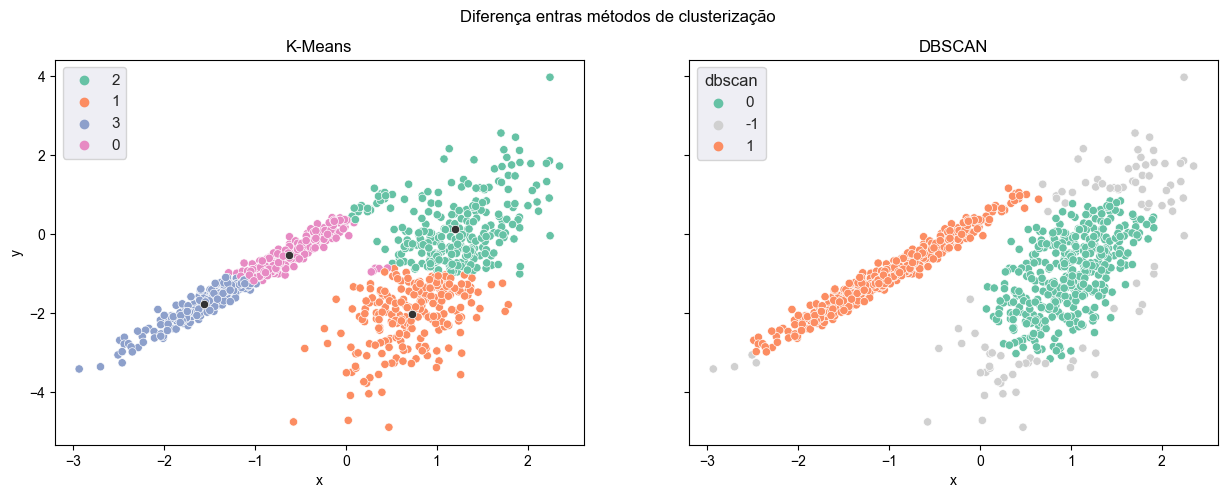

In [7]:
# plotando clusterizações

# criando subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Diferença entras métodos de clusterização')

# setando tema de cores
sns.set_theme(palette='Set2')

# plot k-means
ax1 = sns.scatterplot(
    data=df,
    x='x',
    y='y',
    hue='kmeans',
    ax=axes[0]
)
ax1 = sns.scatterplot(
    x=centroides[:,0], 
    y=centroides[:,1],
    color='.2',
    ax=axes[0]
)

axes[0].set_title('K-Means')

# plot DBSCAN
ax2 = sns.scatterplot(
    data=df,
    x='x',
    y='y',
    hue='dbscan',
    ax=axes[1],
    palette={
        '0':'#66c2a5', 
        '1':'#fc8d62', 
        '-1':'#d0d0d0' # cor dos itens não clusterizados
    }
)
axes[1].set_title('DBSCAN')